### Neural Network (NN) training for numerical derivative calculation using polynomial and trigonometric functions

The objective is to train the NN to calculate the numerical derivates. For that, the code started by making sure that were only polynomals with four and five degrees. The polynomials roots was also fixed to have only even and not even degrees in order to be consistent to the paratity of the polynomials.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def generate_polynomials_with_parity(x, degree, num_polynomials):
    y = []
    dy = []
    
    for _ in range(num_polynomials):
        # Ensure the number of roots is consistent with the parity of the degree
        if degree % 2 == 0:  # Even degree
            num_roots = degree
        else:  # Odd degree
            num_roots = degree - 1
        
        # Generate random roots in the interval of [0, 1]
        roots = np.random.uniform(0, 1, num_roots // 2)
        roots = list(roots) + list(-roots)
        if degree % 2 != 0:
            roots += [0]
        
        # Construct the polynomial coefficients from the roots
        coeffs = np.poly(roots)
        
        # Generate the polynomial and its derivative
        polinomio = np.polyval(coeffs, x)
        derivada = np.polyval(np.polyder(coeffs), x)
        
        # Normalize the polynomial and its derivative
        max_poly = np.max(np.abs(polinomio)) + 1e-8  
        max_deriv = np.max(np.abs(derivada)) + 1e-8  
        
        y.append(polinomio / max_poly)
        dy.append(derivada / max_deriv)
    
    # Stack the results into arrays
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# Applying the interval of x and the number of polynomials
x = np.linspace(-0.5, 0.5, 50).reshape(-1, 1) 
num_polynomials = 1000

y_degree_4, dy_degree_4 = generate_polynomials_with_parity(x, degree=4, num_polynomials=num_polynomials // 2)
y_degree_5, dy_degree_5 = generate_polynomials_with_parity(x, degree=5, num_polynomials=num_polynomials // 2)

# Combine the results from both degrees
y = np.vstack((y_degree_4, y_degree_5))
dy = np.vstack((dy_degree_4, dy_degree_5))

print(y.shape)
print(dy.shape)

(1000, 50)
(1000, 50)


One can vary the number of neurons, layers, and other parameters of the MLPRegressor. The training data size chosen was 80% of the dataset. It is worth highlighting that the number of layers should not be too large; otherwise, the model may overfit.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 10  
layers = 10   

model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=10000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.001,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Iteration 1, loss = 0.22179204
Iteration 2, loss = 0.21001587
Iteration 3, loss = 0.20297627
Iteration 4, loss = 0.19763760
Iteration 5, loss = 0.19300501
Iteration 6, loss = 0.18821352
Iteration 7, loss = 0.18329099
Iteration 8, loss = 0.17844298
Iteration 9, loss = 0.17345258
Iteration 10, loss = 0.16815514
Iteration 11, loss = 0.16288073
Iteration 12, loss = 0.15749292
Iteration 13, loss = 0.15227121
Iteration 14, loss = 0.14689151
Iteration 15, loss = 0.14175821
Iteration 16, loss = 0.13638884
Iteration 17, loss = 0.13118336
Iteration 18, loss = 0.12610401
Iteration 19, loss = 0.12105838
Iteration 20, loss = 0.11594661
Iteration 21, loss = 0.11106256
Iteration 22, loss = 0.10639363
Iteration 23, loss = 0.10169509
Iteration 24, loss = 0.09708495
Iteration 25, loss = 0.09265454
Iteration 26, loss = 0.08812884
Iteration 27, loss = 0.08365424
Iteration 28, loss = 0.07936607
Iteration 29, loss = 0.07535358
Iteration 30, loss = 0.07161013
Iteration 31, loss = 0.06830525
Iteration 32, los

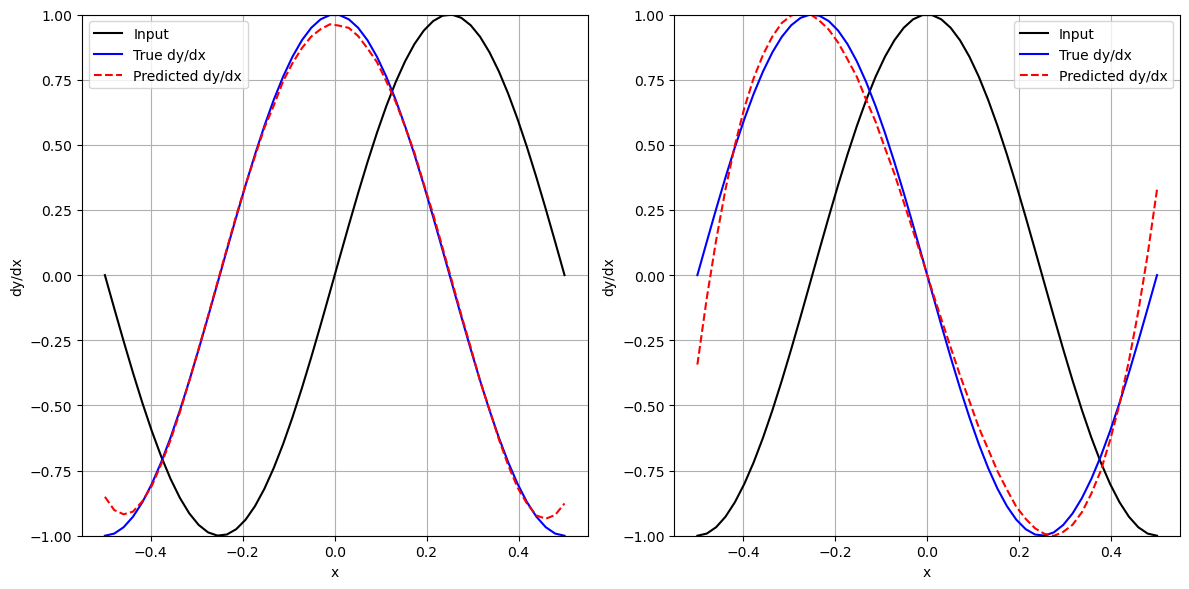

In [24]:
new_x = np.linspace(-0.5, 0.5, y.shape[1]).reshape(-1, 1)  
new_y = np.sin(2 * np.pi * new_x).T  
new_dy = np.cos(2 * np.pi * new_x).T  

# Teste 1
plt.figure(figsize=(12, 6))  # Ajustar o tamanho da figura
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
predicted_derivative = model.predict(new_y)

plt.plot(new_x, new_y[0], label='Input', color='black')
plt.plot(new_x, new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x, predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-1, 1)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# Teste 2
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
new_y = np.cos(2 * np.pi * new_x).T
new_dy = -np.sin(2 * np.pi * new_x).T
predicted_derivative = model.predict(new_y)

plt.plot(new_x, new_y[0], label='Input', color='black')
plt.plot(new_x, new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x, predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-1, 1)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
